In [ ]:
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os

species = "Photon"
E_J_to_MeV = 1.0 / 1.6e-13
step = 2

# 设定数据文件的路径和文件名模式
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024aa'
file_prefix = 'distfun'
file_suffix = '.sdf'
file_index = 32
file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
file_path = os.path.join(base_path, file_name)

# 读取数据
distfun_Data = sh.getdata(file_path)
sh.list_variables(distfun_Data)

# 提取网格数据和分布函数数据
x = getattr(distfun_Data, f'Grid_x_en_{species}').data[0]/1e-6 
en_MeV = getattr(distfun_Data, f'Grid_x_en_{species}').data[1] * E_J_to_MeV
N = getattr(distfun_Data, f'dist_fn_x_en_{species}').data

# 确保 en_MeV 和 N 的长度一致
length = len(en_MeV)
if length % step != 0:  # 判断 length 是否能被 step 整除
    en_MeV = en_MeV[:-(length % step)]  # 裁剪 en_MeV
    N = N[:, :-(length % step)]  # 裁剪 N，注意 N 是二维数组

dE = np.mean(np.diff(en_MeV))  
dx = np.mean(np.diff(x))  

# 计算 dN/dE
dN_dEdx = N / (dE * dx)  # 单位能量间隔内的粒子数密度

# 合并bin
E_merged = 0.5 * (en_MeV[0::step] + en_MeV[1::step])
N_merged = N[0::step] + N[1::step]
dE_merged = np.mean(np.diff(E_merged))
spectrum = N_merged / dE_merged

mask = (x >= 13) & (x <= 14)
# 使用掩码筛选数据
dN_dEdx_sum = np.sum(dN_dEdx[mask, :], axis=0)

plt.figure(figsize=(10, 6))
plt.semilogy(en_MeV, dN_dEdx_sum, label=f'$\\sum_x \\frac{{dN}}{{dE\\,dx}}$ from $x=20$ to $x=21$', linewidth=2)
plt.legend(fontsize=12)
plt.title('Energy Spectrum from $x=20$ to $x=21$', fontsize=16)
plt.xlabel('Energy (MeV)', fontsize=14)
plt.ylabel(r'$\sum_x \frac{dN}{dE \, dx}$', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024a/distfun0032.sdf
t() = time
x(1501, 1001, 1001) = grid
y(1501, 1001, 1001) = grid
z(1501, 1001, 1001) = grid
xc(1500, 1000, 1000) = grid_mid
yc(1500, 1000, 1000) = grid_mid
zc(1500, 1000, 1000) = grid_mid
Absorption_Fraction_of_Laser_Energy_Absorbed____ <class 'sdf.BlockConstant'> [1]
Absorption_Total_Laser_Energy_Injected__J_ <class 'sdf.BlockConstant'> [1]
CPUs_Current_rank <class 'sdf.BlockPlainVariable'> [0, 0, 0]
CPUs_Original_rank <class 'sdf.BlockPlainVariable'> [ 1,  7, 20]
Grid_CPUs_Original_rank <class 'sdf.BlockPlainMesh'> [ 2,  8, 21]
Grid_CPUs_Original_rank_mid <class 'sdf.BlockPlainMesh'> [ 1,  7, 20]
Grid_Grid <class 'sdf.BlockPlainMesh'> [1501, 1001, 1001]
Grid_Grid_mid <class 'sdf.BlockPlainMesh'> [1500, 1000, 1000]
Grid_allenergy0_Electron <class 'sdf.BlockPlainMesh'> [2000]
Grid_allenergy0_Electron_mid <class 'sdf.BlockPlainMesh'> [1999]
Grid_allenergy0_Photon <class 'sdf.BlockPlai

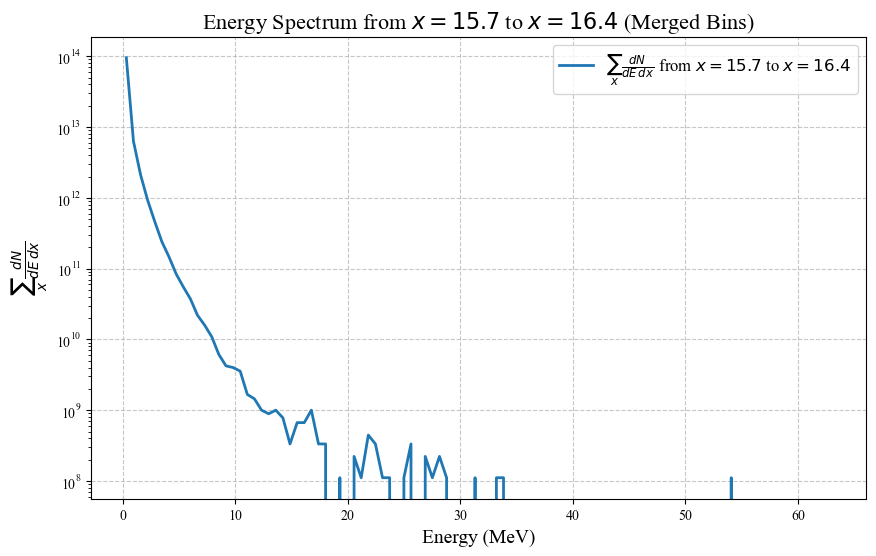

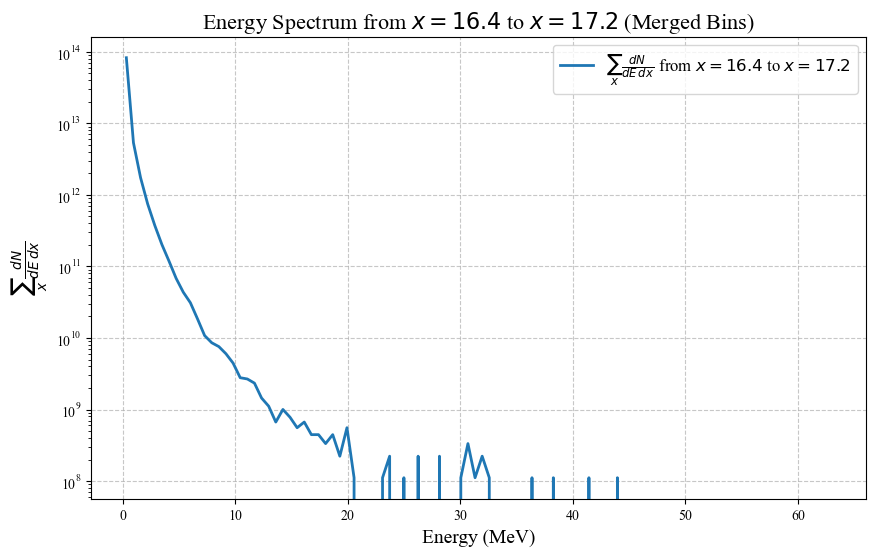

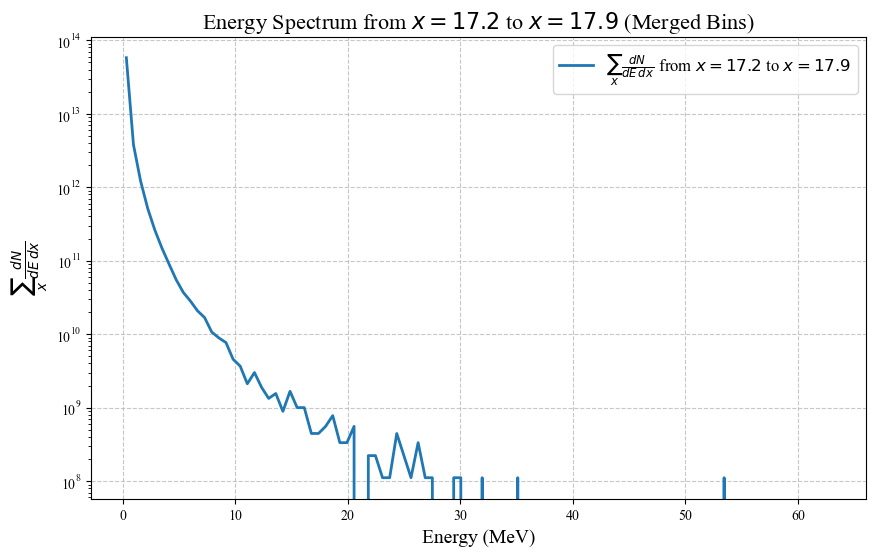

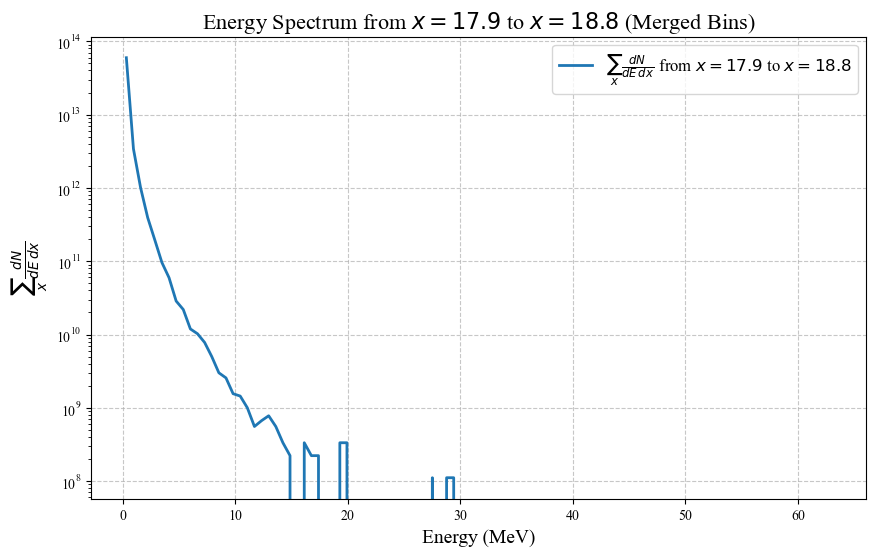

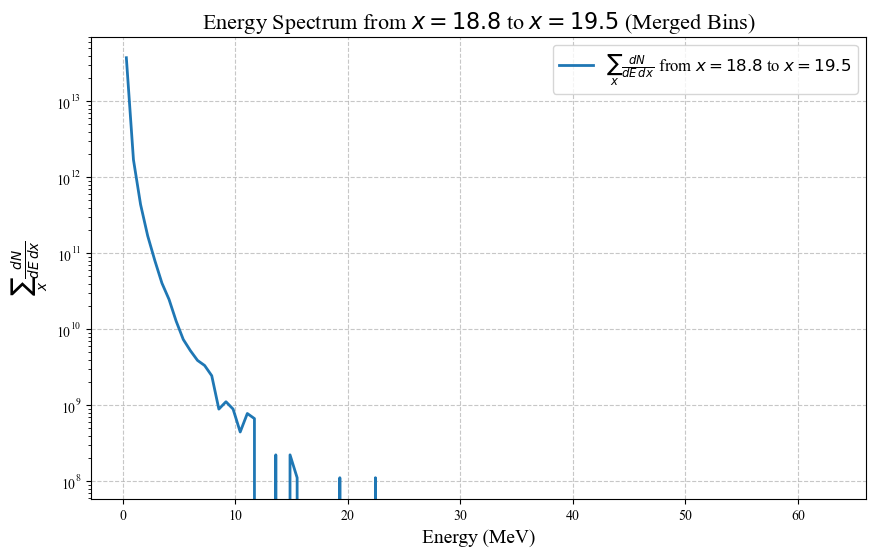

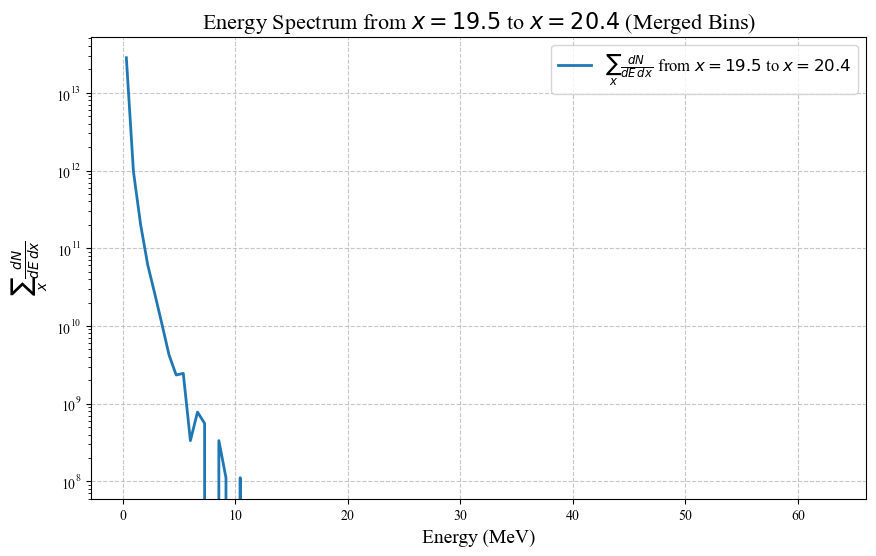

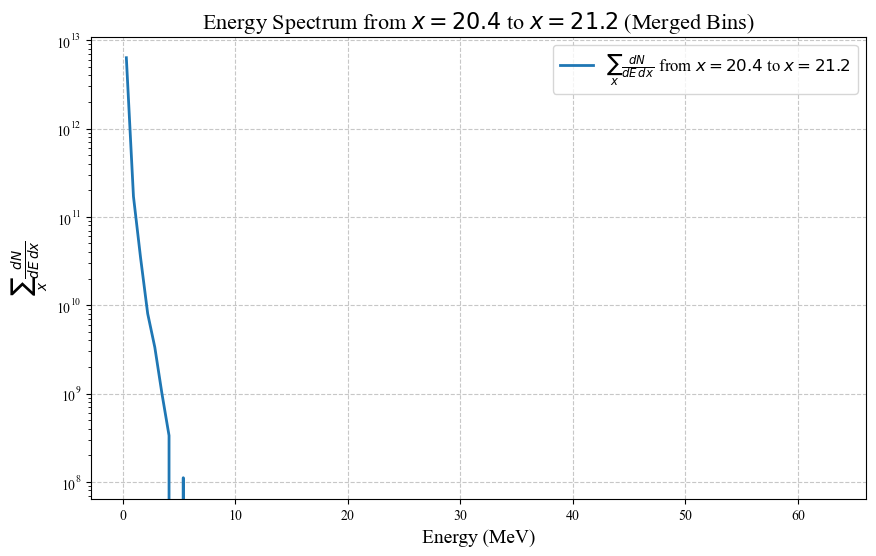

In [5]:
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os

species = "Photon"
E_J_to_MeV = 1.0 / 1.6e-13
step = 20  # 每20个能量bin合并为一个

# 设定数据文件的路径和文件名模式
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024a'
file_prefix = 'distfun'
file_suffix = '.sdf'
file_index = 32
file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
file_path = os.path.join(base_path, file_name)

# 读取数据
distfun_Data = sh.getdata(file_path)
sh.list_variables(distfun_Data)

# 提取网格数据和分布函数数据
x = getattr(distfun_Data, f'Grid_x_en_{species}').data[0] / 1e-6  # 转换为微米
en_MeV = getattr(distfun_Data, f'Grid_x_en_{species}').data[1] * E_J_to_MeV
N = getattr(distfun_Data, f'dist_fn_x_en_{species}').data

# 确保 en_MeV 和 N 的长度一致
length = len(en_MeV)
if length % step != 0:  # 判断 length 是否能被 step 整除
    en_MeV = en_MeV[:-(length % step)]  # 裁剪 en_MeV
    N = N[:, :-(length % step)]  # 裁剪 N，注意 N 是二维数组

dE = np.mean(np.diff(en_MeV))  
dx = np.mean(np.diff(x))  

# 计算 dN/dE
dN_dEdx = N / (dE * dx)  # 单位能量间隔内的粒子数密度

# 定义多个范围
ranges = [(15.7, 16.4), (16.4, 17.2), (17.2, 17.9), (17.9, 18.8), (18.8, 19.5), (19.5, 20.4), (20.4, 21.2)]

# 绘制每个范围的能谱图
for start, end in ranges:
    mask = (x >= start) & (x <= end)
    dN_dEdx_sum = np.sum(dN_dEdx[mask, :], axis=0)
    
    # 合并能量 bin
    E_merged = np.mean(en_MeV.reshape(-1, step), axis=1)  # 每 step 个 bin 的能量均值
    dN_dEdx_sum_merged = np.sum(dN_dEdx_sum.reshape(-1, step), axis=1)  # 每 step 个 bin 的粒子数密度求和

    plt.figure(figsize=(10, 6))
    plt.semilogy(E_merged, dN_dEdx_sum_merged, label=f'$\\sum_x \\frac{{dN}}{{dE\\,dx}}$ from $x={start}$ to $x={end}$', linewidth=2)
    plt.legend(fontsize=12)
    plt.title(f'Energy Spectrum from $x={start}$ to $x={end}$ (Merged Bins)', fontsize=16)
    plt.xlabel('Energy (MeV)', fontsize=14)
    plt.ylabel(r'$\sum_x \frac{dN}{dE \, dx}$', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

Absorption_Fraction_of_Laser_Energy_Absorbed____ <class 'sdf.BlockConstant'> [1]
Absorption_Total_Laser_Energy_Injected__J_ <class 'sdf.BlockConstant'> [1]
CPUs_Current_rank <class 'sdf.BlockPlainVariable'> [0, 0, 0]
CPUs_Original_rank <class 'sdf.BlockPlainVariable'> [ 3,  1, 50]
Grid_CPUs_Original_rank <class 'sdf.BlockPlainMesh'> [ 4,  2, 51]
Grid_CPUs_Original_rank_mid <class 'sdf.BlockPlainMesh'> [ 3,  1, 50]
Grid_Grid <class 'sdf.BlockPlainMesh'> [1501, 1001, 1001]
Grid_Grid_mid <class 'sdf.BlockPlainMesh'> [1500, 1000, 1000]
Grid_allenergy0_Electron <class 'sdf.BlockPlainMesh'> [2000]
Grid_allenergy0_Electron_mid <class 'sdf.BlockPlainMesh'> [1999]
Grid_allenergy0_Photon <class 'sdf.BlockPlainMesh'> [2000]
Grid_allenergy0_Photon_mid <class 'sdf.BlockPlainMesh'> [1999]
Grid_allenergy_Electron <class 'sdf.BlockPlainMesh'> [2000]
Grid_allenergy_Electron_mid <class 'sdf.BlockPlainMesh'> [1999]
Grid_allenergy_Photon <class 'sdf.BlockPlainMesh'> [2000]
Grid_allenergy_Photon_mid <class

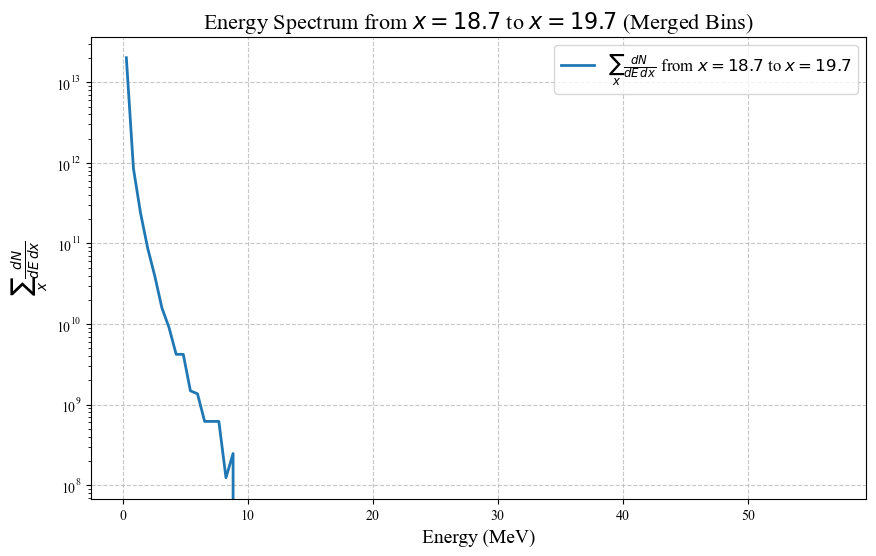

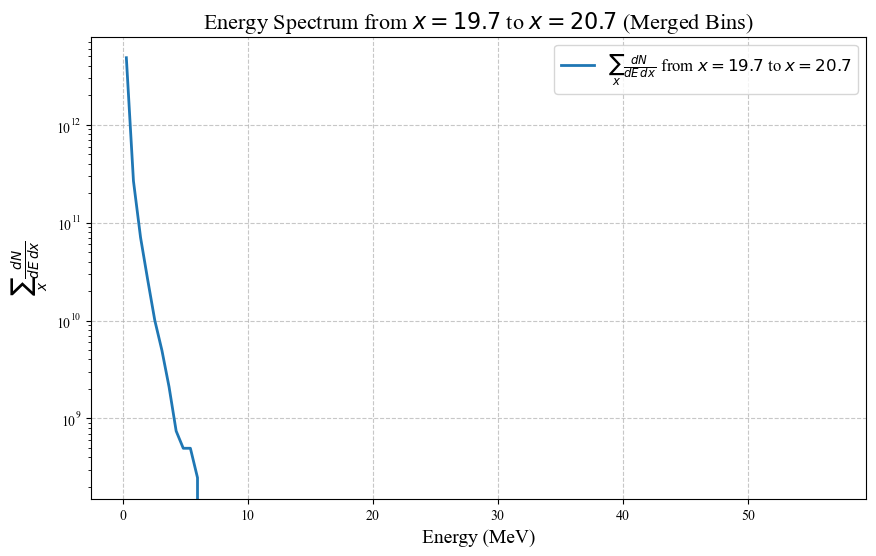

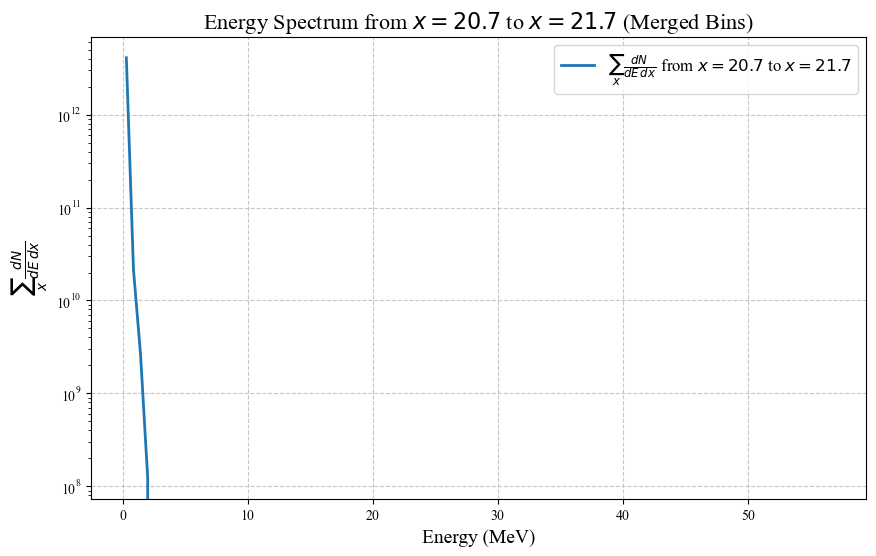

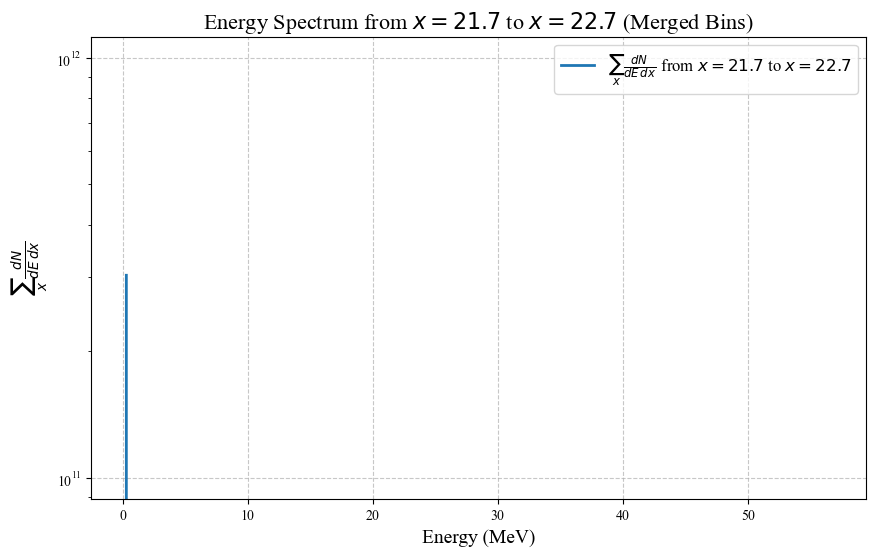

In [4]:
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os

species = "Photon"
E_J_to_MeV = 1.0 / 1.6e-13
step = 20  # 每20个能量bin合并为一个

# 设定数据文件的路径和文件名模式
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024ab+2'
file_prefix = 'distfun'
file_suffix = '.sdf'
file_index = 32
file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
file_path = os.path.join(base_path, file_name)

# 读取数据
distfun_Data = sh.getdata(file_path)
sh.list_variables(distfun_Data)

# 提取网格数据和分布函数数据
x = getattr(distfun_Data, f'Grid_x_en_{species}').data[0] / 1e-6  # 转换为微米
en_MeV = getattr(distfun_Data, f'Grid_x_en_{species}').data[1] * E_J_to_MeV
N = getattr(distfun_Data, f'dist_fn_x_en_{species}').data

# 确保 en_MeV 和 N 的长度一致
length = len(en_MeV)
if length % step != 0:  # 判断 length 是否能被 step 整除
    en_MeV = en_MeV[:-(length % step)]  # 裁剪 en_MeV
    N = N[:, :-(length % step)]  # 裁剪 N，注意 N 是二维数组

dE = np.mean(np.diff(en_MeV))  
dx = np.mean(np.diff(x))  

# 计算 dN/dE
dN_dEdx = N / (dE * dx)  # 单位能量间隔内的粒子数密度

# 定义多个范围
ranges = [(18.7, 19.7), (19.7, 20.7), (20.7, 21.7), (21.7, 22.7)]

# 绘制每个范围的能谱图
for start, end in ranges:
    mask = (x >= start) & (x <= end)
    dN_dEdx_sum = np.sum(dN_dEdx[mask, :], axis=0)
    
    # 合并能量 bin
    E_merged = np.mean(en_MeV.reshape(-1, step), axis=1)  # 每 step 个 bin 的能量均值
    dN_dEdx_sum_merged = np.sum(dN_dEdx_sum.reshape(-1, step), axis=1)  # 每 step 个 bin 的粒子数密度求和

    plt.figure(figsize=(10, 6))
    plt.semilogy(E_merged, dN_dEdx_sum_merged, label=f'$\\sum_x \\frac{{dN}}{{dE\\,dx}}$ from $x={start}$ to $x={end}$', linewidth=2)
    plt.legend(fontsize=12)
    plt.title(f'Energy Spectrum from $x={start}$ to $x={end}$ (Merged Bins)', fontsize=16)
    plt.xlabel('Energy (MeV)', fontsize=14)
    plt.ylabel(r'$\sum_x \frac{dN}{dE \, dx}$', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

In [28]:
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os

species = "Photon"
E_J_to_MeV = 1.0 / 1.6e-13
step = 20  # 每20个能量bin合并为一个

# 设定数据文件的路径和文件名模式
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024+b2'
file_prefix = 'distfun'
file_suffix = '.sdf'
file_index = 32
file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
file_path = os.path.join(base_path, file_name)

# 读取数据
distfun_Data = sh.getdata(file_path)
sh.list_variables(distfun_Data)

# 提取网格数据和分布函数数据
x = getattr(distfun_Data, f'Grid_x_en_{species}').data[0] / 1e-6  # 转换为微米
en_MeV = getattr(distfun_Data, f'Grid_x_en_{species}').data[1] * E_J_to_MeV
N = getattr(distfun_Data, f'dist_fn_x_en_{species}').data

# 确保 en_MeV 和 N 的长度一致
length = len(en_MeV)
if length % step != 0:  # 判断 length 是否能被 step 整除
    en_MeV = en_MeV[:-(length % step)]  # 裁剪 en_MeV
    N = N[:, :-(length % step)]  # 裁剪 N，注意 N 是二维数组

dE = np.mean(np.diff(en_MeV))  
dx = np.mean(np.diff(x))  

# 计算 dN/dE
dN_dEdx = N / (dE * dx)  # 单位能量间隔内的粒子数密度

# 定义多个范围
ranges = [(14.8, 15.6), (15.8, 16.6), (16.6, 17.3), (17.3, 18.0), (18.2, 18.8), (18.8, 19.6), (19.6, 20.4)]

# 绘制每个范围的能谱图
for start, end in ranges:
    mask = (x >= start) & (x <= end)
    dN_dEdx_sum = np.sum(dN_dEdx[mask, :], axis=0)
    
    # 合并能量 bin
    E_merged = np.mean(en_MeV.reshape(-1, step), axis=1)  # 每 step 个 bin 的能量均值
    dN_dEdx_sum_merged = np.sum(dN_dEdx_sum.reshape(-1, step), axis=1)  # 每 step 个 bin 的粒子数密度求和

    plt.figure(figsize=(10, 6))
    plt.semilogy(E_merged, dN_dEdx_sum_merged, label=f'$\\sum_x \\frac{{dN}}{{dE\\,dx}}$ from $x={start}$ to $x={end}$', linewidth=2)
    plt.legend(fontsize=12)
    plt.title(f'Energy Spectrum from $x={start}$ to $x={end}$ (Merged Bins)', fontsize=16)
    plt.xlabel('Energy (MeV)', fontsize=14)
    plt.ylabel(r'$\sum_x \frac{dN}{dE \, dx}$', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

ERROR opening file .//media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024+b2/distfun0032.sdf: No such file or directory


/home/lan/anaconda3/lib/python3.12/site-packages/sdf_helper/sdf_helper.py:108: SyntaxWarning: invalid escape sequence '\m'
  sym = '{\mu}'
/home/lan/anaconda3/lib/python3.12/site-packages/sdf_helper/sdf_helper.py:2073: SyntaxWarning: invalid escape sequence '\%'
  return string.replace('%', '\%')


FileNotFoundError: [Errno 2] No such file or directory: './/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024+b2/distfun0032.sdf'